<a href="https://colab.research.google.com/github/rafiechautie/Autism-detector-for-children/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import os
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.applications import vgg16, vgg19, efficientnet, mobilenet, inception_v3
from tensorflow.keras import Model
from PIL import Image 
import matplotlib.image as mpimg

# Install Kaggle + Import Data


In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d cihan063/autism-image-data

 99% 228M/229M [00:00<00:00, 317MB/s]
100% 229M/229M [00:00<00:00, 311MB/s]


In [7]:
! mkdir autism

In [8]:
! unzip -qq autism-image-data.zip -d autism
!ls autism

AutismDataset


In [9]:
!ls autism/AutismDataset

consolidated  test  train  valid


In [2]:
#Base
file_dir ='autism/AutismDataset/consolidated'

# Autist and Non-Autist
autist_dir = os.path.join(file_dir, 'Autistic')
nonautist_dir = os.path.join(file_dir, 'Non_Autistic')

print('total autist:', len(os.listdir(autist_dir)))
print('total nonautist:', len(os.listdir(nonautist_dir)))

total autist: 1470
total nonautist: 1470


In [40]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import splitfolders

In [42]:
splitfolders.ratio(file_dir, '/content/autism/', seed=1337, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 2940 files [00:00, 4570.93 files/s]


In [3]:
train_dir ='autism/train/'
val_dir = 'autism/val'
test_dir = 'autism/test'

# Train Dir
train_autist_dir = os.path.join(train_dir, 'Autistic')
train_nonautist_dir = os.path.join(train_dir, 'Non_Autistic')

print('total training autist:', len(os.listdir(train_autist_dir)))
print('total training nonautist:', len(os.listdir(train_nonautist_dir)))

# Val Dir
val_autist_dir = os.path.join(val_dir, 'Autistic')
val_nonautist_dir = os.path.join(val_dir, 'Non_Autistic')
print('total val autist:', len(os.listdir(val_autist_dir)))
print('total val nonautist:', len(os.listdir(val_nonautist_dir)))

total training autist: 1176
total training nonautist: 1176
total val autist: 147
total val nonautist: 147


# Pre-processing Image

In [4]:
list_autism = os.listdir(train_dir)

In [5]:
jumlah = 0

for x in list_autism:
  dc = os.path.join(train_dir, x)
  y = len(os.listdir(dc))
  print(x + ':', y)
  jumlah = jumlah + y

  namagbr = os.listdir(dc)
  for z in range(4):
    gbr_dc = os.path.join(dc, namagbr[z])
    gbr = Image.open(gbr_dc)
    print('ukuran', gbr.size)  
  print('/////////////////')

print('\nTotal Gambar :', jumlah)

Autistic: 1176
ukuran (278, 426)
ukuran (354, 389)
ukuran (291, 336)
ukuran (190, 212)
/////////////////
Non_Autistic: 1176
ukuran (313, 413)
ukuran (247, 292)
ukuran (170, 224)
ukuran (327, 388)
/////////////////

Total Gambar : 2352


Autistic


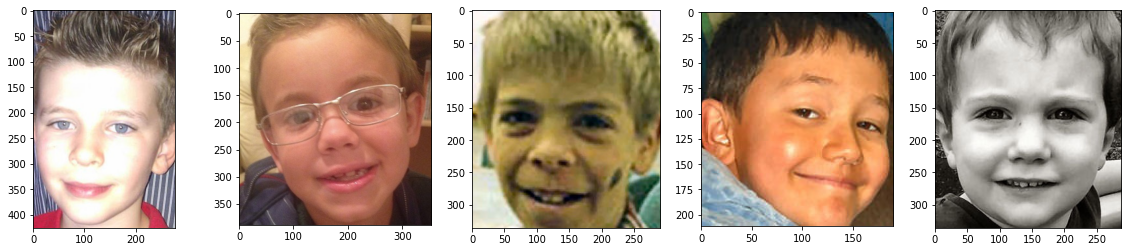

Non_Autistic


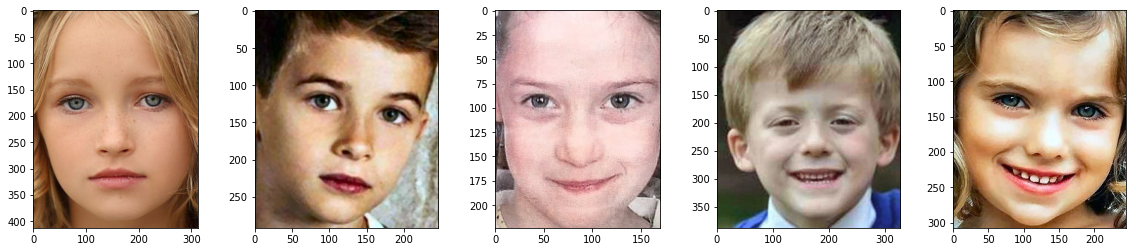

In [6]:
# check images class
for item in list_autism:
  print(item)
  class_dir = os.path.join(train_dir,item)
  class_img = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, gbr_dc in enumerate(class_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, gbr_dc))
    plt.imshow(img)
  plt.show()

# Augmentation Image

In [7]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      )

val_datagen = ImageDataGenerator(
    rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=235,
)

val_generator = val_datagen.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10,
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


# Modelling

## Self-Modelling

In [8]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [9]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
es = EarlyStopping(monitor= "val_accuracy" , patience= 5, restore_best_weights=True)
mc = ModelCheckpoint(filepath="Model1_Best.h5", monitor="val_accuracy", save_best_only= True)

In [11]:
history1 = model1.fit(
    train_generator, epochs=15, verbose=2, callbacks=[es, mc], 
    validation_data=val_generator, validation_steps=10) 

Epoch 1/15
11/11 - 40s - loss: 0.6946 - accuracy: 0.5102 - val_loss: 0.6969 - val_accuracy: 0.4600 - 40s/epoch - 4s/step
Epoch 2/15
11/11 - 45s - loss: 0.6757 - accuracy: 0.5697 - val_loss: 0.6661 - val_accuracy: 0.5700 - 45s/epoch - 4s/step
Epoch 3/15
11/11 - 49s - loss: 0.6795 - accuracy: 0.5935 - val_loss: 0.6078 - val_accuracy: 0.6900 - 49s/epoch - 4s/step
Epoch 4/15
11/11 - 41s - loss: 0.6653 - accuracy: 0.6122 - val_loss: 0.6670 - val_accuracy: 0.5600 - 41s/epoch - 4s/step
Epoch 5/15
11/11 - 37s - loss: 0.6711 - accuracy: 0.5162 - val_loss: 0.6336 - val_accuracy: 0.6500 - 37s/epoch - 3s/step
Epoch 6/15
11/11 - 35s - loss: 0.6626 - accuracy: 0.6420 - val_loss: 0.6552 - val_accuracy: 0.5800 - 35s/epoch - 3s/step
Epoch 7/15
11/11 - 35s - loss: 0.6426 - accuracy: 0.6403 - val_loss: 0.6409 - val_accuracy: 0.6200 - 35s/epoch - 3s/step
Epoch 8/15
11/11 - 36s - loss: 0.6488 - accuracy: 0.6373 - val_loss: 0.6513 - val_accuracy: 0.5600 - 36s/epoch - 3s/step


In [12]:
model1.evaluate(train_generator)
model1.evaluate(val_generator)

30/30 [==============================] - 1s 46ms/step - loss: 0.6285 - accuracy: 0.6599


[0.6285395622253418, 0.6598639488220215]

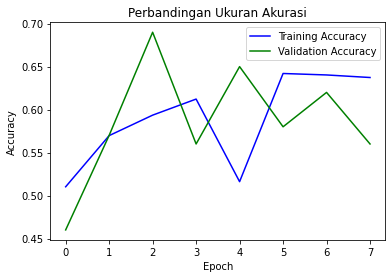

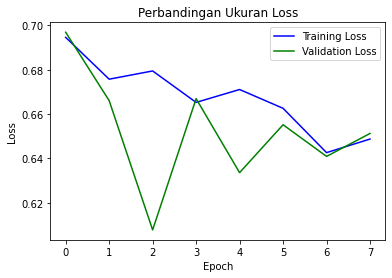

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot the results
epochs = range(len(history1.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history1.history['loss'], label='Training Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## VGG16

In [14]:
preprocess_input = vgg16.preprocess_input

train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator2 = train_datagen2.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator2 = val_datagen2.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [17]:
vgg16_model = vgg16.VGG16(input_shape=(250, 250, 3), include_top=False)

for layer in vgg16_model.layers:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [18]:
last_layer = vgg16_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [19]:
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)                
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(vgg16_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [20]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
mc2 = ModelCheckpoint(filepath="Model2_Best.h5", monitor="val_accuracy", save_best_only= True)

In [22]:
history2 = model2.fit(
    train_generator2, epochs=15, verbose=2, callbacks=[es, mc2], 
    validation_data=val_generator2, validation_steps=10) 

Epoch 1/15
8/8 - 61s - loss: 15.1668 - accuracy: 0.5247 - val_loss: 5.7581 - val_accuracy: 0.6400 - 61s/epoch - 8s/step
Epoch 2/15
8/8 - 19s - loss: 6.0262 - accuracy: 0.6382 - val_loss: 6.3045 - val_accuracy: 0.5700 - 19s/epoch - 2s/step
Epoch 3/15
8/8 - 20s - loss: 3.5623 - accuracy: 0.7270 - val_loss: 4.8703 - val_accuracy: 0.5900 - 20s/epoch - 2s/step
Epoch 4/15
8/8 - 20s - loss: 2.1798 - accuracy: 0.7521 - val_loss: 3.9066 - val_accuracy: 0.6300 - 20s/epoch - 2s/step
Epoch 5/15
8/8 - 20s - loss: 1.3044 - accuracy: 0.7866 - val_loss: 2.8080 - val_accuracy: 0.6900 - 20s/epoch - 2s/step
Epoch 6/15
8/8 - 20s - loss: 0.9103 - accuracy: 0.8134 - val_loss: 2.0295 - val_accuracy: 0.7100 - 20s/epoch - 2s/step
Epoch 7/15
8/8 - 20s - loss: 0.6342 - accuracy: 0.8495 - val_loss: 1.8164 - val_accuracy: 0.7300 - 20s/epoch - 2s/step
Epoch 8/15
8/8 - 20s - loss: 0.4312 - accuracy: 0.8861 - val_loss: 2.4479 - val_accuracy: 0.6800 - 20s/epoch - 2s/step
Epoch 9/15
8/8 - 20s - loss: 0.2966 - accuracy:

In [23]:
model2.evaluate(train_generator2)
model2.evaluate(val_generator2)

30/30 [==============================] - 4s 123ms/step - loss: 1.9677 - accuracy: 0.7109


[1.9676544666290283, 0.7108843326568604]

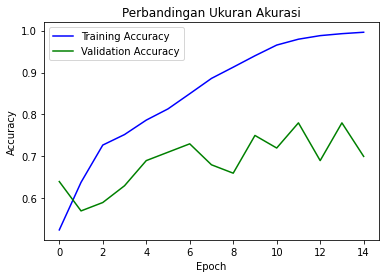

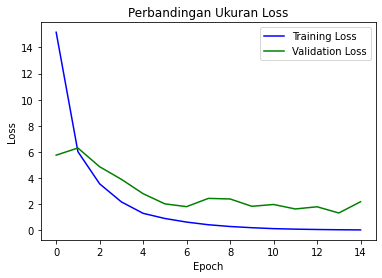

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot the results
epochs = range(len(history2.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history2.history['loss'], label='Training Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

##VGG19

In [25]:
preprocess_input2 = vgg19.preprocess_input

train_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)
val_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)

train_generator3 = train_datagen3.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator3 = val_datagen3.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [26]:
vgg19_model = vgg19.VGG19(input_shape=(250, 250, 3), include_top=False)

for layer in vgg19_model.layers:
  layer.trainable = False
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [27]:
last_layer2 = vgg19_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer2.output_shape)
last_output2 = last_layer2.output

last layer output shape:  (None, 7, 7, 512)


In [28]:
x2 = tf.keras.layers.GlobalMaxPooling2D()(last_output2)
x2 = tf.keras.layers.Flatten()(x2)
x2 = tf.keras.layers.Dense(512, activation='relu')(x2)                
x2 = tf.keras.layers.Dense(1, activation='sigmoid')(x2)           

# Append the dense network to the base model
model3 = Model(vgg19_model.input, x2)     

# Print the model summary. See your dense network connected at the end.
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [29]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
mc3 = ModelCheckpoint(filepath="Model3_Best.h5", monitor="val_accuracy", save_best_only= True)

In [31]:
history3 = model3.fit(
    train_generator3, epochs=15, verbose=2, callbacks=[es, mc3], 
    validation_data=val_generator3, validation_steps=10) 

Epoch 1/15
8/8 - 25s - loss: 9.7420 - accuracy: 0.5604 - val_loss: 11.5883 - val_accuracy: 0.5500 - 25s/epoch - 3s/step
Epoch 2/15
8/8 - 24s - loss: 5.0937 - accuracy: 0.6811 - val_loss: 4.4839 - val_accuracy: 0.7300 - 24s/epoch - 3s/step
Epoch 3/15
8/8 - 23s - loss: 2.9502 - accuracy: 0.7411 - val_loss: 2.4239 - val_accuracy: 0.7100 - 23s/epoch - 3s/step
Epoch 4/15
8/8 - 23s - loss: 1.4882 - accuracy: 0.7764 - val_loss: 3.3471 - val_accuracy: 0.6300 - 23s/epoch - 3s/step
Epoch 5/15
8/8 - 24s - loss: 0.9710 - accuracy: 0.7997 - val_loss: 1.6114 - val_accuracy: 0.7500 - 24s/epoch - 3s/step
Epoch 6/15
8/8 - 24s - loss: 0.6655 - accuracy: 0.8350 - val_loss: 1.6735 - val_accuracy: 0.7600 - 24s/epoch - 3s/step
Epoch 7/15
8/8 - 23s - loss: 0.4331 - accuracy: 0.8788 - val_loss: 1.8252 - val_accuracy: 0.7000 - 23s/epoch - 3s/step
Epoch 8/15
8/8 - 23s - loss: 0.2720 - accuracy: 0.9120 - val_loss: 1.4710 - val_accuracy: 0.7300 - 23s/epoch - 3s/step
Epoch 9/15
8/8 - 23s - loss: 0.1773 - accuracy:

In [32]:
model3.evaluate(train_generator3)
model3.evaluate(val_generator3)

30/30 [==============================] - 3s 101ms/step - loss: 1.6338 - accuracy: 0.7143


[1.6338088512420654, 0.7142857313156128]

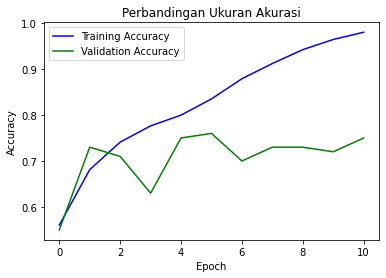

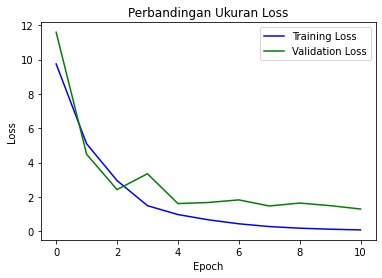

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot the results
epochs = range(len(history3.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history3.history['loss'], label='Training Loss', color='blue')
plt.plot(history3.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Efficient Net B0

In [34]:
preprocess_input3 = efficientnet.preprocess_input

train_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)
val_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)

train_generator4 = train_datagen4.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator4 = val_datagen4.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [35]:
en_model = efficientnet.EfficientNetB0(input_shape=(250, 250, 3), include_top=False)

for layer in en_model.layers:
  layer.trainable = False
en_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 250, 250, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 250, 250, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 251, 251, 3)  0           ['normalization[0][0

In [36]:
last_layer3 = en_model.get_layer('top_conv')
print('last layer output shape: ', last_layer3.output_shape)
last_output3 = last_layer3.output

last layer output shape:  (None, 8, 8, 1280)


In [37]:
x3 = tf.keras.layers.GlobalMaxPooling2D()(last_output3)
x3 = tf.keras.layers.Flatten()(x3)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)                
x3 = tf.keras.layers.Dense(1, activation='sigmoid')(x3)           

# Append the dense network to the base model
model4 = Model(en_model.input, x3)    

# Print the model summary. See your dense network connected at the end.
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 250, 250, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 250, 250, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 251, 251, 3)  0           ['normalization[0][0]']    

In [38]:
model4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
mc4 = ModelCheckpoint(filepath="Model4_Best.h5", monitor="val_accuracy", save_best_only= True)

In [40]:
history4 = model4.fit(
    train_generator4, epochs=15, verbose=2, callbacks=[es, mc4], 
    validation_data=val_generator4, validation_steps=10) 

Epoch 1/15
8/8 - 20s - loss: 22.4425 - accuracy: 0.5200 - val_loss: 13.6169 - val_accuracy: 0.5700 - 20s/epoch - 3s/step
Epoch 2/15
8/8 - 10s - loss: 7.4013 - accuracy: 0.4906 - val_loss: 2.4247 - val_accuracy: 0.4400 - 10s/epoch - 1s/step
Epoch 3/15
8/8 - 10s - loss: 1.9426 - accuracy: 0.5213 - val_loss: 2.2644 - val_accuracy: 0.4300 - 10s/epoch - 1s/step
Epoch 4/15
8/8 - 11s - loss: 1.2548 - accuracy: 0.5548 - val_loss: 0.9822 - val_accuracy: 0.6000 - 11s/epoch - 1s/step
Epoch 5/15
8/8 - 11s - loss: 0.9076 - accuracy: 0.6016 - val_loss: 0.8201 - val_accuracy: 0.6400 - 11s/epoch - 1s/step
Epoch 6/15
8/8 - 11s - loss: 0.7738 - accuracy: 0.6293 - val_loss: 0.7303 - val_accuracy: 0.6900 - 11s/epoch - 1s/step
Epoch 7/15
8/8 - 10s - loss: 0.6982 - accuracy: 0.6675 - val_loss: 0.6519 - val_accuracy: 0.6200 - 10s/epoch - 1s/step
Epoch 8/15
8/8 - 10s - loss: 0.6400 - accuracy: 0.6875 - val_loss: 0.6395 - val_accuracy: 0.6400 - 10s/epoch - 1s/step
Epoch 9/15
8/8 - 11s - loss: 0.5859 - accuracy

In [41]:
model4.evaluate(train_generator4)
model4.evaluate(val_generator4)

30/30 [==============================] - 2s 63ms/step - loss: 0.5578 - accuracy: 0.7041


[0.557816207408905, 0.704081654548645]

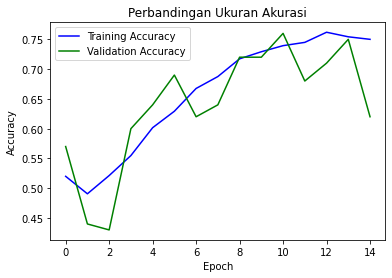

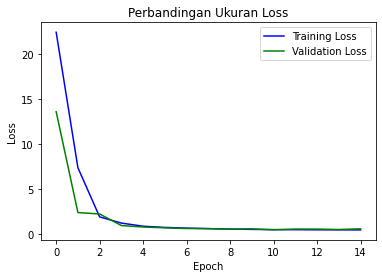

<Figure size 432x288 with 0 Axes>

In [43]:
# Plot the results
epochs = range(len(history4.history['accuracy']))


#Plot training and validation accuracy per epoch
plt.plot(epochs, history4.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history4.history['loss'], label='Training Loss', color='blue')
plt.plot(history4.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Mobile Net

In [44]:
preprocess_input4 = mobilenet.preprocess_input

train_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)
val_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)

train_generator5 = train_datagen5.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator5 = val_datagen5.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [45]:
mn_model = mobilenet.MobileNet(input_shape=(250, 250, 3), include_top=False)

for layer in mn_model.layers:
  layer.trainable = False
mn_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 125, 125, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 125, 125, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 125, 125, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 125, 125, 32)     128       
 ation)                                         

In [46]:
last_layer4 = mn_model.get_layer('conv_pw_13_relu')
print('last layer output shape: ', last_layer4.output_shape)
last_output4 = last_layer4.output

last layer output shape:  (None, 7, 7, 1024)


In [47]:
x4 = tf.keras.layers.GlobalMaxPooling2D()(last_output4)
x4 = tf.keras.layers.Flatten()(x4)
x4 = tf.keras.layers.Dense(512, activation='relu')(x4)                
x4 = tf.keras.layers.Dense(1, activation='sigmoid')(x4)           

# Append the dense network to the base model
model5 = Model(mn_model.input, x4)    

# Print the model summary. See your dense network connected at the end.
model5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 125, 125, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 125, 125, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 125, 125, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 125, 125, 32)     128       
 ation)                                                    

In [48]:
model5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
mc5 = ModelCheckpoint(filepath="Model5_Best.h5", monitor="val_accuracy", save_best_only= True)

In [50]:
history5 = model5.fit(
    train_generator5, epochs=15, verbose=2, callbacks=[es, mc5], 
    validation_data=val_generator5, validation_steps=10)

Epoch 1/15
8/8 - 14s - loss: 6.3009 - accuracy: 0.4996 - val_loss: 0.8113 - val_accuracy: 0.6900 - 14s/epoch - 2s/step
Epoch 2/15
8/8 - 10s - loss: 1.4038 - accuracy: 0.5638 - val_loss: 1.2335 - val_accuracy: 0.5900 - 10s/epoch - 1s/step
Epoch 3/15
8/8 - 10s - loss: 0.9307 - accuracy: 0.6224 - val_loss: 0.7160 - val_accuracy: 0.6800 - 10s/epoch - 1s/step
Epoch 4/15
8/8 - 10s - loss: 0.6784 - accuracy: 0.6807 - val_loss: 0.7660 - val_accuracy: 0.6400 - 10s/epoch - 1s/step
Epoch 5/15
8/8 - 10s - loss: 0.6049 - accuracy: 0.7092 - val_loss: 0.5281 - val_accuracy: 0.7400 - 10s/epoch - 1s/step
Epoch 6/15
8/8 - 9s - loss: 0.5207 - accuracy: 0.7368 - val_loss: 0.5539 - val_accuracy: 0.6900 - 9s/epoch - 1s/step
Epoch 7/15
8/8 - 10s - loss: 0.5028 - accuracy: 0.7415 - val_loss: 0.5074 - val_accuracy: 0.7700 - 10s/epoch - 1s/step
Epoch 8/15
8/8 - 9s - loss: 0.4700 - accuracy: 0.7649 - val_loss: 0.4542 - val_accuracy: 0.7700 - 9s/epoch - 1s/step
Epoch 9/15
8/8 - 10s - loss: 0.4531 - accuracy: 0.78

In [51]:
model5.evaluate(train_generator5)
model5.evaluate(val_generator5)

30/30 [==============================] - 2s 54ms/step - loss: 0.5052 - accuracy: 0.7687


[0.5051605105400085, 0.7687074542045593]

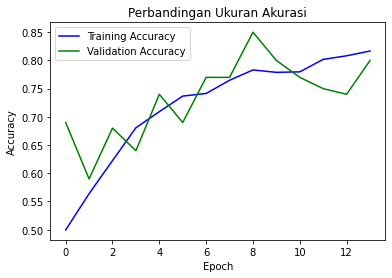

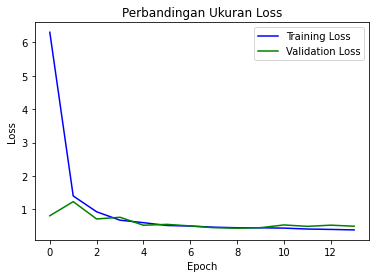

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot the results
epochs = range(len(history5.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history5.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history5.history['loss'], label='Training Loss', color='blue')
plt.plot(history5.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Inception V3

In [53]:
preprocess_input5 = inception_v3.preprocess_input

train_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)
val_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)

train_generator6 = train_datagen6.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator6 = val_datagen6.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [54]:
inc_model = inception_v3.InceptionV3(input_shape=(250, 250, 3), include_top=False)

for layer in inc_model.layers:
  layer.trainable = False
inc_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 124, 124, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                      

In [55]:
last_layer5 = inc_model.get_layer('mixed10')
print('last layer output shape: ', last_layer5.output_shape)
last_output5 = last_layer5.output

last layer output shape:  (None, 6, 6, 2048)


In [56]:
x5 = tf.keras.layers.GlobalMaxPooling2D()(last_output5)
x5 = tf.keras.layers.Flatten()(x5)
x5 = tf.keras.layers.Dense(512, activation='relu')(x5)                
x5 = tf.keras.layers.Dense(1, activation='sigmoid')(x5)           

# Append the dense network to the base model
model6 = Model(inc_model.input, x5)    

# Print the model summary. See your dense network connected at the end.
model6.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 124, 124, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                           

In [57]:
model6.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
mc6 = ModelCheckpoint(filepath="Model6_Best.h5", monitor="val_accuracy", save_best_only= True)

In [59]:
history6 = model6.fit(
    train_generator6, epochs=15, verbose=2, callbacks=[es, mc6], 
    validation_data=val_generator6, validation_steps=10)

Epoch 1/15
8/8 - 25s - loss: 6.1885 - accuracy: 0.5149 - val_loss: 2.3180 - val_accuracy: 0.5000 - 25s/epoch - 3s/step
Epoch 2/15
8/8 - 11s - loss: 1.1513 - accuracy: 0.4979 - val_loss: 0.6711 - val_accuracy: 0.5800 - 11s/epoch - 1s/step
Epoch 3/15
8/8 - 11s - loss: 0.7063 - accuracy: 0.5391 - val_loss: 0.6668 - val_accuracy: 0.5600 - 11s/epoch - 1s/step
Epoch 4/15
8/8 - 11s - loss: 0.6489 - accuracy: 0.5923 - val_loss: 0.5947 - val_accuracy: 0.7100 - 11s/epoch - 1s/step
Epoch 5/15
8/8 - 11s - loss: 0.6121 - accuracy: 0.6752 - val_loss: 0.5838 - val_accuracy: 0.6800 - 11s/epoch - 1s/step
Epoch 6/15
8/8 - 10s - loss: 0.5914 - accuracy: 0.6845 - val_loss: 0.6071 - val_accuracy: 0.7000 - 10s/epoch - 1s/step
Epoch 7/15
8/8 - 11s - loss: 0.5687 - accuracy: 0.7185 - val_loss: 0.5461 - val_accuracy: 0.6900 - 11s/epoch - 1s/step
Epoch 8/15
8/8 - 11s - loss: 0.5544 - accuracy: 0.7211 - val_loss: 0.5626 - val_accuracy: 0.7300 - 11s/epoch - 1s/step
Epoch 9/15
8/8 - 11s - loss: 0.5434 - accuracy: 

In [60]:
model6.evaluate(train_generator6)
model6.evaluate(val_generator6)

30/30 [==============================] - 2s 77ms/step - loss: 0.5220 - accuracy: 0.7449


[0.5219559669494629, 0.7448979616165161]

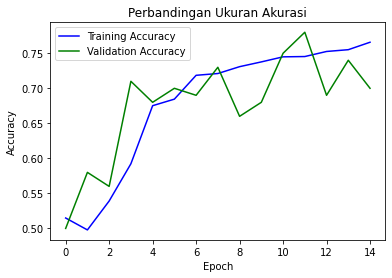

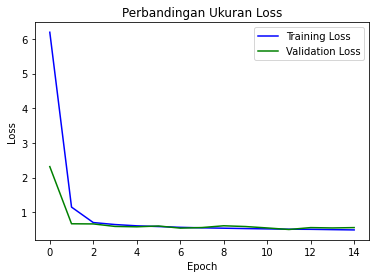

<Figure size 432x288 with 0 Axes>

In [61]:
# Plot the results
epochs = range(len(history6.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history6.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history6.history['loss'], label='Training Loss', color='blue')
plt.plot(history6.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

# **Testing**

Saving Non_Autistic.113.jpg to Non_Autistic.113.jpg
Autistic


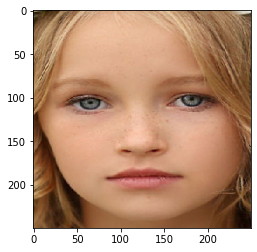

In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(250,250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model3.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [ ]:
## change image_width and image_height
import cv2
nrows = 250
ncolumns  = 250

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

In [ ]:
import random
test_dirr = "autism/AutismDataset/test"
test_imgs = ["autism/AutismDataset/test/{}".format(i) for i in os.listdir(test_dirr)]
random.shuffle(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

In [ ]:
## change model
pred = model2.predict(X)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)

In [ ]:
import pandas as pd
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

,filename,test_labels,predictions
0,Autistic.9.jpg,1,0
1,Non_Autistic.15.jpg,0,0
2,Autistic.123.jpg,1,0
3,Non_Autistic.76.jpg,0,0
4,Autistic.56.jpg,1,0
...,...,...,...
295,Autistic.10.jpg,1,0
296,Autistic.145.jpg,1,0
297,Autistic.61.jpg,1,0
298,Non_Autistic.74.jpg,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


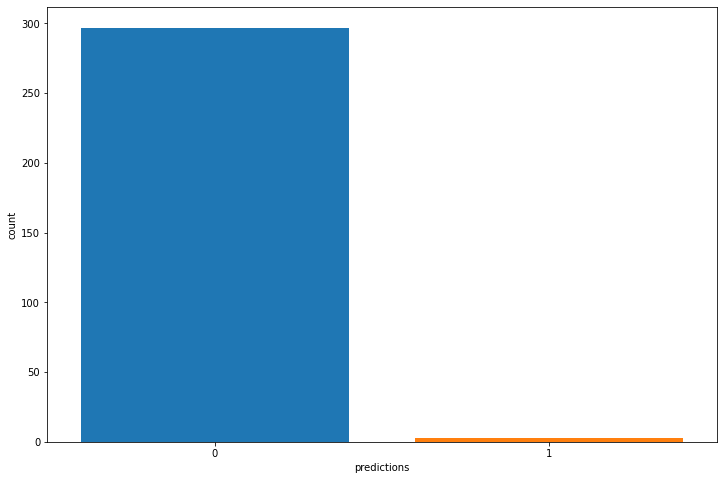

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(test["predictions"], saturation=1)

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

Model Accuracy: 49.00%


In [ ]:
cl_report = classification_report(y_test, predictions)
print(cl_report)

In [ ]:
cn_matrix= confusion_matrix(y_test, predictions)
cn_matrix

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize=(4,4))
for val, i in enumerate(test_imgs[:10]):
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.title(os.path.basename(i) + ' - Prediction: ' +  f"{'Autistic' if predictions[val] == 1 else 'Non-Autistic'}")
    plt.show()

# Deployment